In [4]:
## Function to do Wright-Fisher simulation with selection and a finite sample size
# using priors on Ne, s, and initial allele frequency
# Sample at two time points

# i is a dummy argument so that it can be used with sapply and parSapply
# f1min: the minimum for the initial allele frequency uniform prior
# f1max:
# smin: the minimum for the selection coefficient uniform prior
# smax:
# c1: the size of the first sample (in # chromosomes)
# c2: the size of the second sample (in # chromosomes)
# gen: the number of generations
# ne: a vector of possible Ne values. Simulation picks one to use.
# h: dominance effect
wfs <- function(i, f1min=f1min, f1max=f1max, smin=smin, smax=smax, c1=c1, c2=c2, gen=gen, ne=ne, h=h){ 
	# choose parameters for this simulation
	f1 <- runif(1, min=f1min, max=f1max) # starting allele frequency
	s <- runif(1, min=smin, max=smax) # selection coefficient
	if(length(ne)>1) thisne <- round(sample(ne, 1)) # ne has to be integer for binomial sampling
	if(length(ne)==1) thisne <- round(ne)
	
#	print(paste(f1, s, thisne))
	
	p <- f1 # current allele frequency
	waa <- 1+s # relative fitness of genotype AA
	wab <- 1+s*h
	wbb <- 1
	for(i in 1:gen){
		x <- (waa*p^2 + wab*p*(1-p))/(waa*p^2 + wab*2*p*(1-p) + wbb*(1-p)^2) # probability of sampling allele A, given selection
		p <- rbinom(1,thisne,x)/thisne
#		print(paste(x,p))
	}
	f2 <- p

	f1samp <- rbinom(1,c1,f1)/c1 # first sample allele frequency
	f2samp <- rbinom(1,c2,f2)/c2 # second sample allele frequency

	# calculate summary statistics (Foll et al. 2015 Molecular Ecology Resources)
#	stats <- sumstats(f1samp, f2samp, c1, c2, gen)
	
	# return values
#	out <- c(ne=thisne, f1=f1, s=s, gen=gen, f2=f2, f1samp=f1samp, f2samp=f2samp, fsdprime=stats[1], fsiprime=stats[2])
	out <- c(ne=thisne, f1=f1, s=s, gen=gen, f2=f2, f1samp=f1samp, f2samp=f2samp)
	return(out)
}


In [89]:
data=rep(1,1000)

Run with 0 generations

In [117]:
outputn=lapply(data, wfs, f1min=0.005, f1max=.05, smin=0, smax=0, c1=50, c2=50, gen=1, ne=200, h=0)
outputm=lapply(data, wfs, f1min=0.005, f1max=.05, smin=0, smax=0, c1=25, c2=25, gen=1, ne=50, h=0)
mito=as.data.frame(do.call(rbind, outputm))
mito$diffsamp=abs(mito$f1samp-mito$f2samp)
mito$difffreq=abs(mito$f1-mito$f2)
nuc=as.data.frame(do.call(rbind, outputn))
nuc$diffsamp=abs(nuc$f1samp-nuc$f2samp)
nuc$difffreq=abs(nuc$f1-nuc$f2)

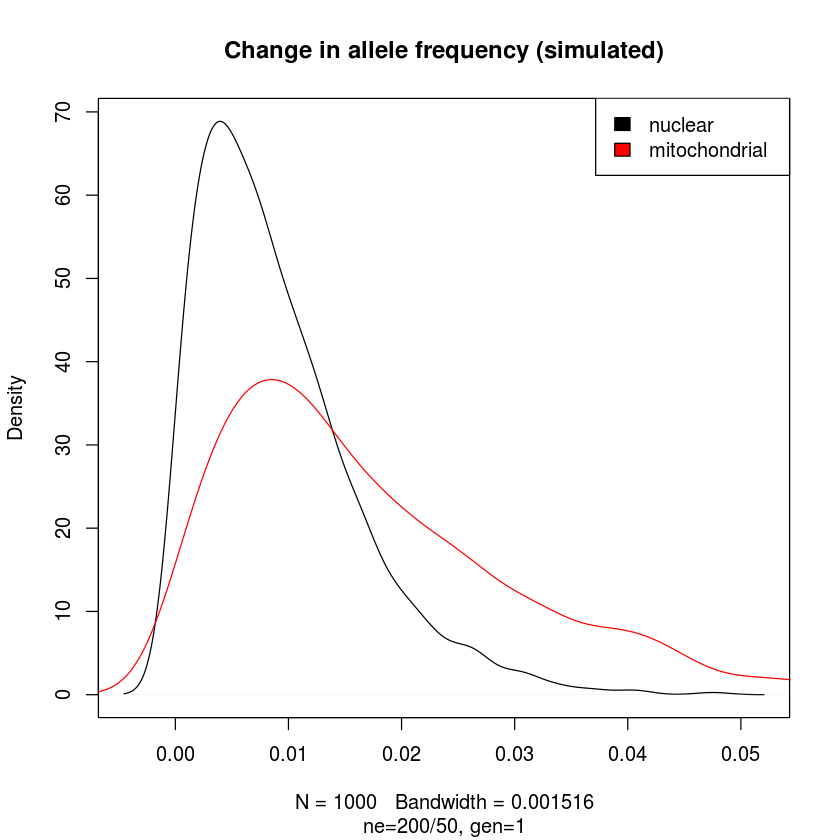

In [118]:
plot(density(nuc$difffreq), main="Change in allele frequency (simulated)", sub="ne=200/50, gen=1")
     lines(density(mito$difffreq), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

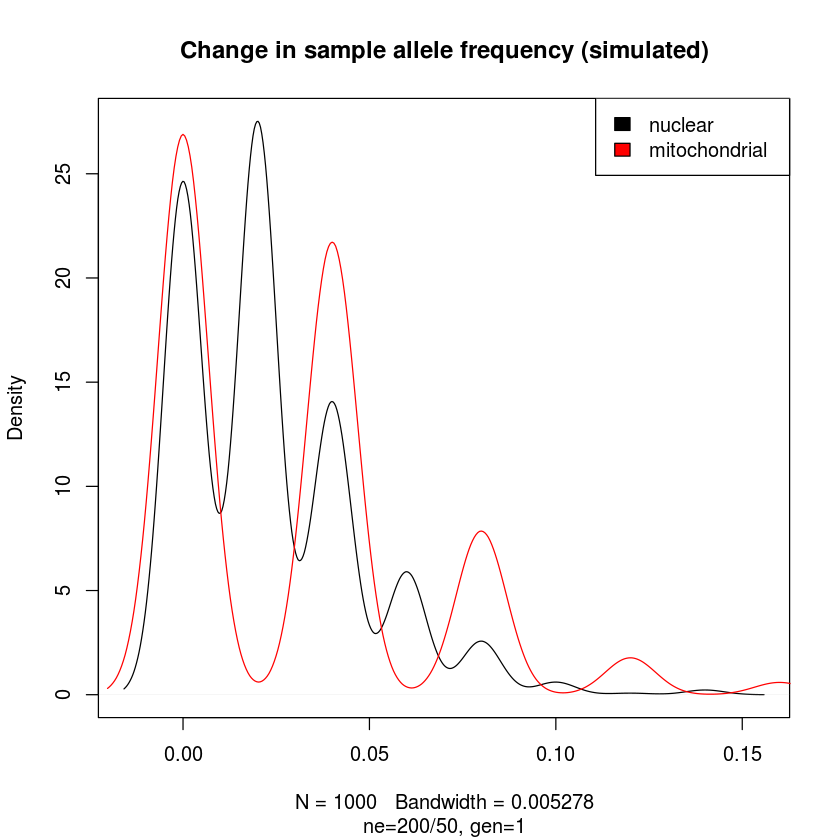

In [119]:
plot(density(nuc$diffsamp), main="Change in sample allele frequency (simulated)", sub="ne=200/50, gen=1")
     lines(density(mito$diffsamp), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

In [86]:
outputn=lapply(data, wfs, f1min=0.05, f1max=0.5, smin=0, smax=0, c1=50, c2=50, gen=0, ne=200, h=0)
outputm=lapply(data, wfs, f1min=0.05, f1max=0.5, smin=0, smax=0, c1=25, c2=25, gen=0, ne=50, h=0)
mito=as.data.frame(do.call(rbind, outputm))
mito$diffsamp=abs(mito$f1samp-mito$f2samp)
mito$difffreq=abs(mito$f1-mito$f2)
nuc=as.data.frame(do.call(rbind, outputn))
nuc$diffsamp=abs(nuc$f1samp-nuc$f2samp)
nuc$difffreq=abs(nuc$f1-nuc$f2)

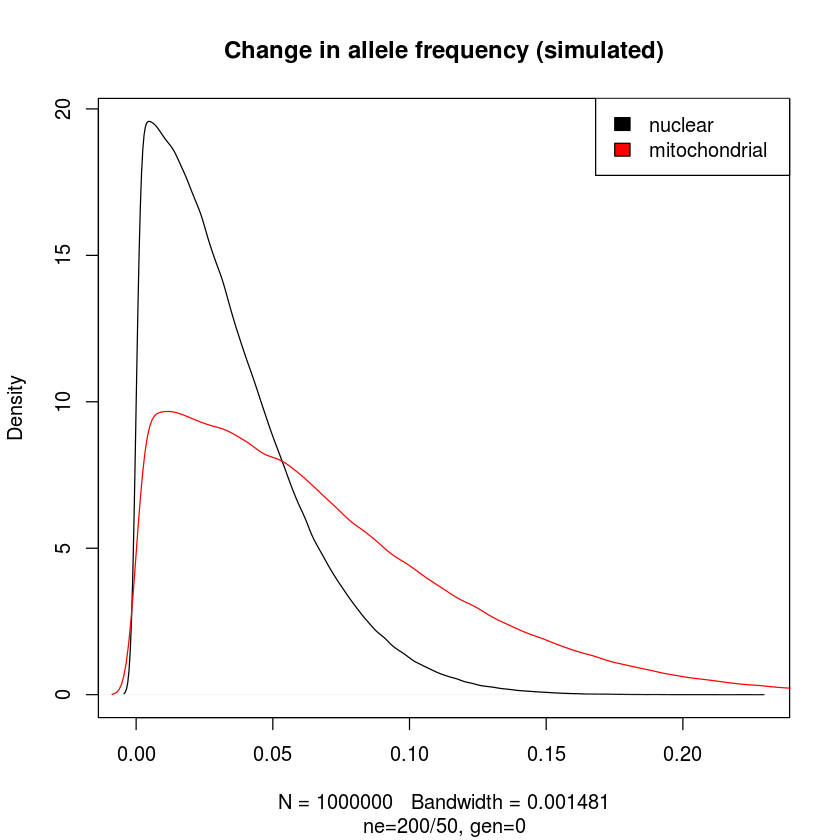

In [87]:
plot(density(nuc$difffreq), main="Change in allele frequency (simulated)", sub="ne=200/50, gen=0")
     lines(density(mito$difffreq), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

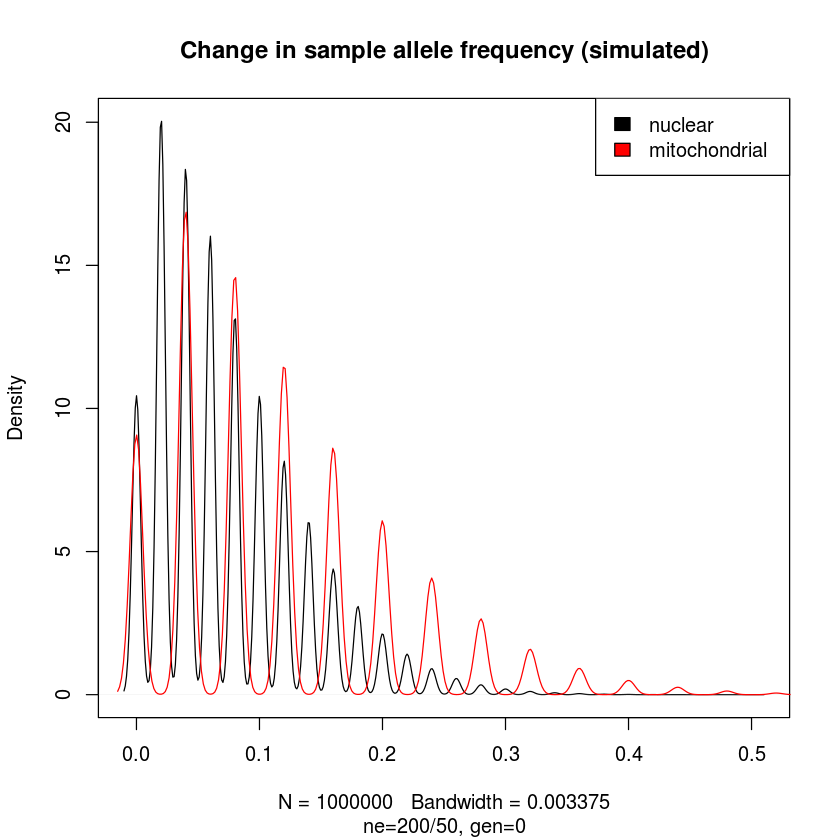

In [88]:
plot(density(nuc$diffsamp), main="Change in sample allele frequency (simulated)", sub="ne=200/50, gen=0")
     lines(density(mito$diffsamp), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))